In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.simplefilter("ignore")

In [2]:
# organ="liver"
# organ="heart"
# organ="kidney"
organ="muscle"

In [3]:
path=f"data/{organ}/" 
filelist=os.listdir(path) 
data=pd.DataFrame()

In [4]:
for  p in filelist[0:]: 
    temp=pd.read_csv(path+p)
    data=pd.concat([data,temp])

# filelist

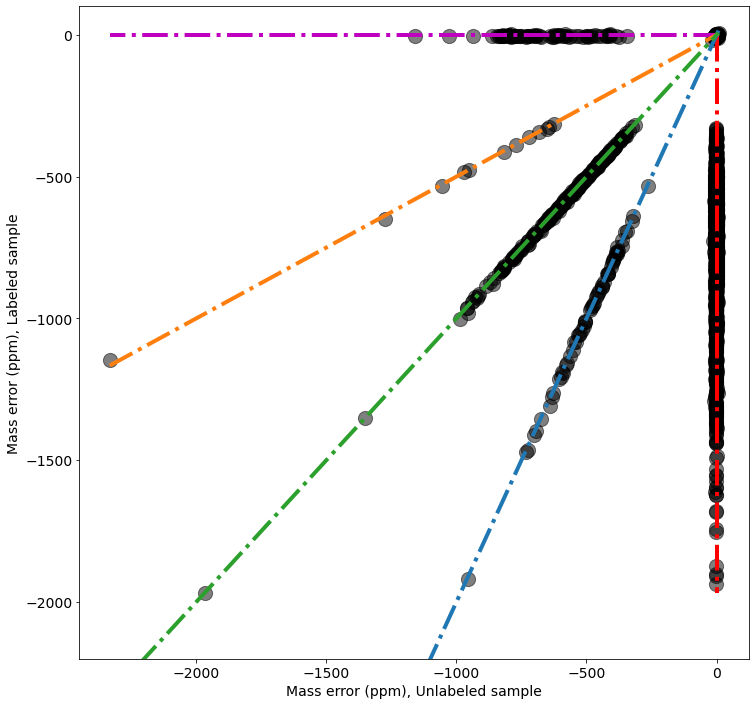

In [5]:
plt.rc('font', size=14) 
plt.figure(figsize=(12,12))
x=np.arange(data.t0_error.min(),data.t0_error.max())

plt.scatter(data.t0_error,data.t31_error,c='k',marker='o',alpha=0.5,s=200)
plt.vlines(x=0,ymin=-data.t31_error.max(),ymax=data.t31_error.min(),color='red',linestyle="-.",linewidth=4)
plt.hlines(y=0,xmin=data.t0_error.max(),xmax=data.t0_error.min(),color='m',linestyle="-.",linewidth=4)

plt.plot(x,2*x,linestyle="-.",linewidth=4)
plt.plot(x,0.5*x,linestyle="-.",linewidth=4) 
plt.plot(x,x,linestyle="-.",linewidth=4) 
plt.ylim([-2200,100])

plt.xlabel("Mass error (ppm), Unlabeled sample")
plt.ylabel("Mass error (ppm), Labeled sample")

plt.savefig(f"Error Plot_{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [6]:
tempdata=data
tempdata["diff"]=abs((tempdata.t0_error - tempdata.t31_error)/tempdata.t31_error)
tempdata[(tempdata.t0_error<-200) & ((tempdata.t31_error<-200))].sort_values(by="diff",ascending=True).head(15)

,Protein,peptied,charge,t0_error,t31_error,diff
150,TITIN_MOUSE,NGVEIEMSEK,2,-872.0,-872.0,0.000000
1,NDUB6_MOUSE,IFPGDTILETGEVIPPMR,2,-515.0,-515.0,0.000000
2,RYR1_MOUSE,VVAEEEQLR,2,-941.1,-941.1,0.000000
0,KPBB_MOUSE,STMLMYQSPTTGLFPTK,2,-528.8,-528.8,0.000000
28,KCRM_MOUSE,ImTVGcVAGDEESYTVFK,2,-493.9,-493.8,0.000203
2,PEBP1_MOUSE,EWHHFLVVNMK,3,-700.4,-700.8,0.000571
4,PDIA1_MOUSE,VDATEESDLAQQYGVR,2,-565.5,-565.1,0.000708
8,G6PI_MOUSE,FAAYFQQGDMESNGK,2,-598.7,-598.2,0.000836
5,ACTN2_MOUSE,NGLMDHEDFR,3,-799.5,-800.2,0.000875
681,TITIN_MOUSE,VLWYKDEVEIQESSK,3,-549.3,-549.8,0.000909


In [7]:
print("t31 \u2245 0,\t",100*tempdata[ (abs(tempdata.t31_error)< 100) & (abs(tempdata.t0_error) >100)].shape[0]/tempdata.shape[0]) #t31=0
print("t0  \u2245 0,\t",100*tempdata[ (abs(tempdata.t0_error)<100) & (abs(tempdata.t31_error) > 100)].shape[0]/tempdata.shape[0]) # t0=0
print("t0  \u2245 0,\t",100*tempdata[(abs(tempdata.t31_error) < 100) & (abs(tempdata.t0_error) < 100)].shape[0]/tempdata.shape[0]) # t0=0 and t31=0
print("t0 \u2245 0.5*t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&(tempdata["diff"]<0.65) & (tempdata["diff"]>0.45)].shape[0]/tempdata.shape[0]) # t0 = 0.5*t31
print("t0 \u2245 t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&  (tempdata["diff"]<0.15)].shape[0]/tempdata.shape[0]) # t0 = t31
print("t0 \u2245 2*t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)& (tempdata["diff"]>0.95)].shape[0]/tempdata.shape[0]) # t0 = 2*t31

t31 ≅ 0,	 1.896233868843824
t0  ≅ 0,	 55.20147484856466
t0  ≅ 0,	 34.869633921516986
t0 ≅ 0.5*t31,	 1.6328680537266262
t0 ≅ t31,	 6.083750329207269
t0 ≅ 2*t31,	 0.31603897814063736


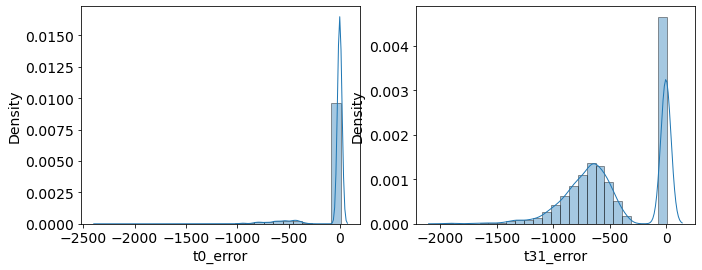

<AxesSubplot:xlabel='t31_error', ylabel='Density'>

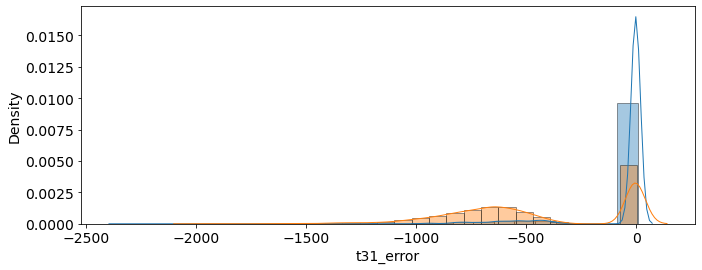

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.distplot(data.t0_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.subplot(1,2,2) 
sns.distplot(data.t31_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.show()

# =======================================================
# =======================================================
# =======================================================

plt.figure(figsize=(11,4))
 
sns.distplot(data.t0_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")
 
sns.distplot(data.t31_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")